In [1]:
!pip install tensorflow --quiet


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

In [5]:
uploaded = files.upload()

Saving stocks_df.csv to stocks_df (1).csv


In [6]:
df = pd.read_csv("stocks_df.csv")
print(df.columns)

Index(['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Change Pct'],
      dtype='object')


In [8]:
print("Available Symbols:\n", df['Stock'].unique())

Available Symbols:
 ['20MICRONS' '21STCENMGM' '3IINFOLTD' ... 'ZUARI' 'ZUARIGLOB' 'ZYDUSWELL']


In [22]:
symbol = 'TATA MOTORS'

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Stock'] == symbol].sort_values('Date')
df.set_index('Date', inplace=True)
close_prices = df['Close'].dropna()

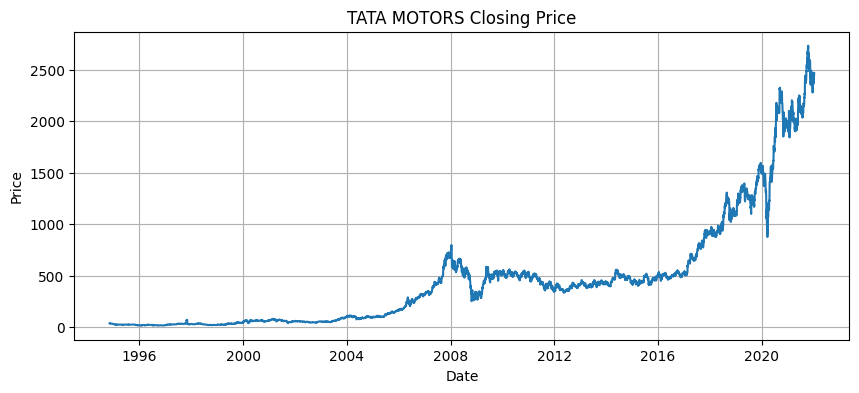

In [23]:
plt.figure(figsize=(10, 4))
plt.plot(close_prices)
plt.title(f"{symbol} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [13]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))

In [14]:
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


In [15]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

In [16]:

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [17]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [18]:
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0022 - val_loss: 3.7029e-05
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.1388e-05 - val_loss: 3.3970e-05
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.0187e-05 - val_loss: 2.9693e-05
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 2.6743e-05 - val_loss: 4.8972e-05
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.6714e-05 - val_loss: 2.5840e-05


In [20]:
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


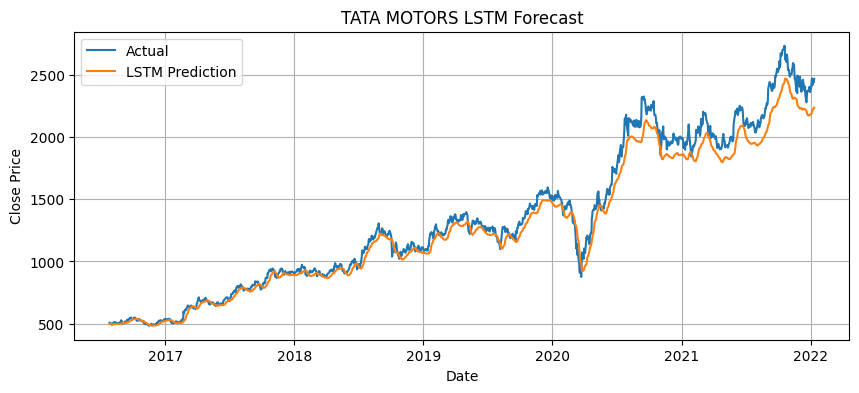

In [24]:
plt.figure(figsize=(10, 4))
plt.plot(close_prices.index[-len(actual):], actual, label='Actual')
plt.plot(close_prices.index[-len(predicted):], predicted, label='LSTM Prediction')
plt.title(f"{symbol} LSTM Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()